In [83]:
import tensorflow as tf
import tensorflow.keras as keras

In [84]:
# Load dataset.
dataset = keras.datasets.cifar10.load_data()

In [85]:
(x_train, y_train), (x_test, y_test) = dataset

In [86]:
help(keras.datasets.cifar10.load_data)

Help on function load_data in module keras.src.datasets.cifar10:

load_data()
    Loads the CIFAR10 dataset.
    
    This is a dataset of 50,000 32x32 color training images and 10,000 test
    images, labeled over 10 categories. See more info at the
    [CIFAR homepage](https://www.cs.toronto.edu/~kriz/cifar.html).
    
    The classes are:
    
    | Label | Description |
    |:-----:|-------------|
    |   0   | airplane    |
    |   1   | automobile  |
    |   2   | bird        |
    |   3   | cat         |
    |   4   | deer        |
    |   5   | dog         |
    |   6   | frog        |
    |   7   | horse       |
    |   8   | ship        |
    |   9   | truck       |
    
    Returns:
      Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.
    
    **x_train**: uint8 NumPy array of grayscale image data with shapes
      `(50000, 32, 32, 3)`, containing the training data. Pixel values range
      from 0 to 255.
    
    **y_train**: uint8 NumPy array of labels (int

In [87]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [105]:
help(keras.layers.Dense)

Help on class Dense in module keras.src.layers.core.dense:

class Dense(keras.src.engine.base_layer.Layer)
 |  Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`). These are all attributes of
 |  `Dense`.
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 0 of t

In [88]:
# Converting image values (x_...) to a 0..1 range.
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

[6]
range of x_... images =  0.09411764705882353  ->  0.9725490196078431


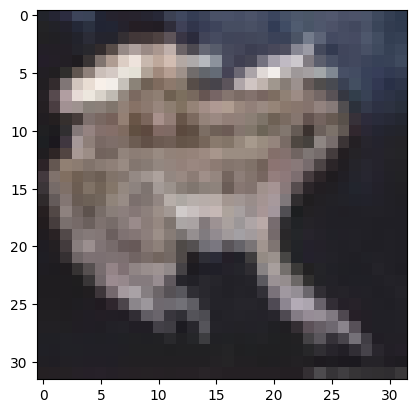

In [89]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print(y_train[0])

print('range of x_... images = ', x_train[0].min(), ' -> ', x_train[0].max())

In [90]:
# Code the model.
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(32, 32, 3)))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 3072)              0         
                                                                 
 dense_15 (Dense)            (None, 128)               393344    
                                                                 
 dense_16 (Dense)            (None, 10)                1290      
                                                                 
Total params: 394634 (1.51 MB)
Trainable params: 394634 (1.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [91]:
# Compile and train
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['mse', 'accuracy'])

In [92]:
history = model.fit(x_train, y_train, epochs=10, verbose=1, validation_data = (x_val, y_val))

Epoch 1/10
1250/1250 [==============================] - 8s 6ms/step - loss: 1.9394 - mse: 27.5327 - accuracy: 0.2934 - val_loss: 1.8425 - val_mse: 27.9648 - val_accuracy: 0.3334
Epoch 2/10
1250/1250 [==============================] - 7s 6ms/step - loss: 1.8011 - mse: 27.5368 - accuracy: 0.3558 - val_loss: 1.7706 - val_mse: 27.9662 - val_accuracy: 0.3664
Epoch 3/10
1250/1250 [==============================] - 7s 5ms/step - loss: 1.7594 - mse: 27.5383 - accuracy: 0.3733 - val_loss: 1.7708 - val_mse: 27.9664 - val_accuracy: 0.3718
Epoch 4/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.7461 - mse: 27.5388 - accuracy: 0.3797 - val_loss: 1.7448 - val_mse: 27.9675 - val_accuracy: 0.3784
Epoch 5/10
1250/1250 [==============================] - 7s 5ms/step - loss: 1.7264 - mse: 27.5394 - accuracy: 0.3864 - val_loss: 1.7225 - val_mse: 27.9674 - val_accuracy: 0.3871
Epoch 6/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.7163 - mse: 27.5398 - accuracy: 

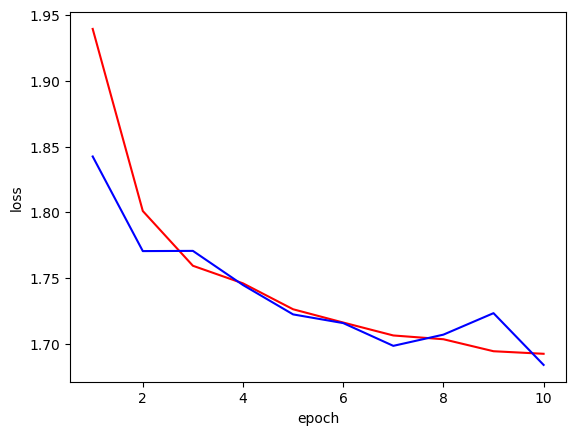

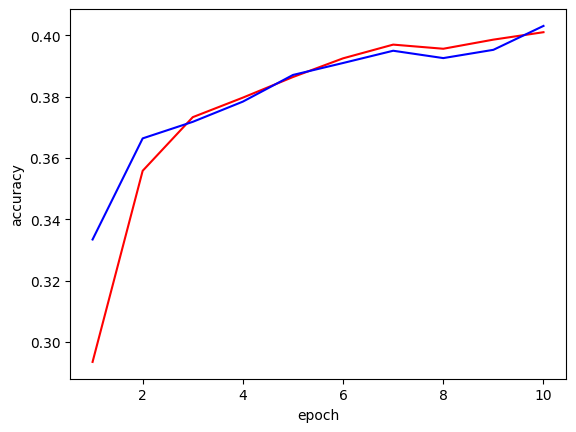

In [95]:
# Plot all relavant data.
def plot_data(history):
    epochs = range(1, 1 + len(history.history['loss']))
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.plot(epochs, history.history['loss'], 'r', label='train_loss')
    plt.plot(epochs, history.history['val_loss'], 'b', label='val_loss')
    plt.show()

    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.plot(epochs, history.history['accuracy'], 'r', label='acc')
    plt.plot(epochs, history.history['val_accuracy'], 'b', label='val_acc')
    plt.show()
    
plot_data(history)

In [109]:
# After added some regularization and removing mse from metrics as it clearly does not work well.
# Code the model.
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(32, 32, 3)))
model.add(keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(keras.layers.Dense(10, activation='softmax', kernel_regularizer=keras.regularizers.l2(0.01)))

model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_17 (Flatten)        (None, 3072)              0         
                                                                 
 dense_27 (Dense)            (None, 128)               393344    
                                                                 
 dense_28 (Dense)            (None, 10)                1290      
                                                                 
Total params: 394634 (1.51 MB)
Trainable params: 394634 (1.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [126]:
# Compile and train
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=25, verbose=1, validation_data = (x_val, y_val))

Epoch 1/25
1250/1250 [==============================] - 9s 6ms/step - loss: 1.9268 - accuracy: 0.3440 - val_loss: 1.9463 - val_accuracy: 0.3443
Epoch 2/25
1250/1250 [==============================] - 7s 5ms/step - loss: 1.9264 - accuracy: 0.3449 - val_loss: 1.9125 - val_accuracy: 0.3470
Epoch 3/25
1250/1250 [==============================] - 7s 5ms/step - loss: 1.9303 - accuracy: 0.3431 - val_loss: 1.9495 - val_accuracy: 0.3272
Epoch 4/25
1250/1250 [==============================] - 7s 5ms/step - loss: 1.9266 - accuracy: 0.3449 - val_loss: 1.9145 - val_accuracy: 0.3328
Epoch 5/25
1250/1250 [==============================] - 7s 6ms/step - loss: 1.9234 - accuracy: 0.3466 - val_loss: 1.8871 - val_accuracy: 0.3596
Epoch 6/25
1250/1250 [==============================] - 7s 5ms/step - loss: 1.9214 - accuracy: 0.3465 - val_loss: 1.8841 - val_accuracy: 0.3595
Epoch 7/25
1250/1250 [==============================] - 7s 6ms/step - loss: 1.9326 - accuracy: 0.3421 - val_loss: 1.9305 - val_accuracy:

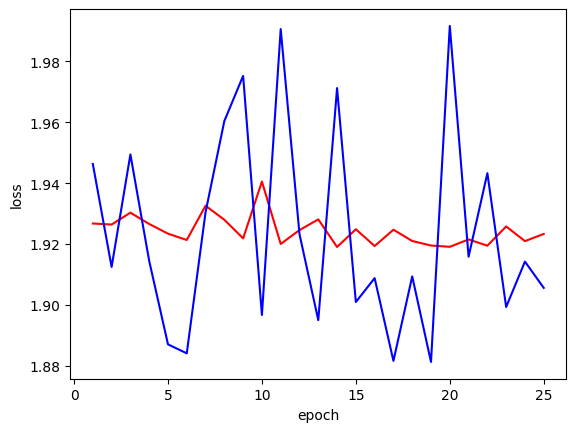

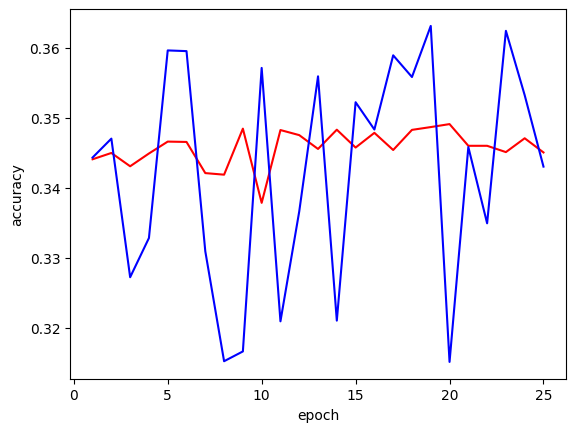

313/313 [==============================] - 0s 1ms/step


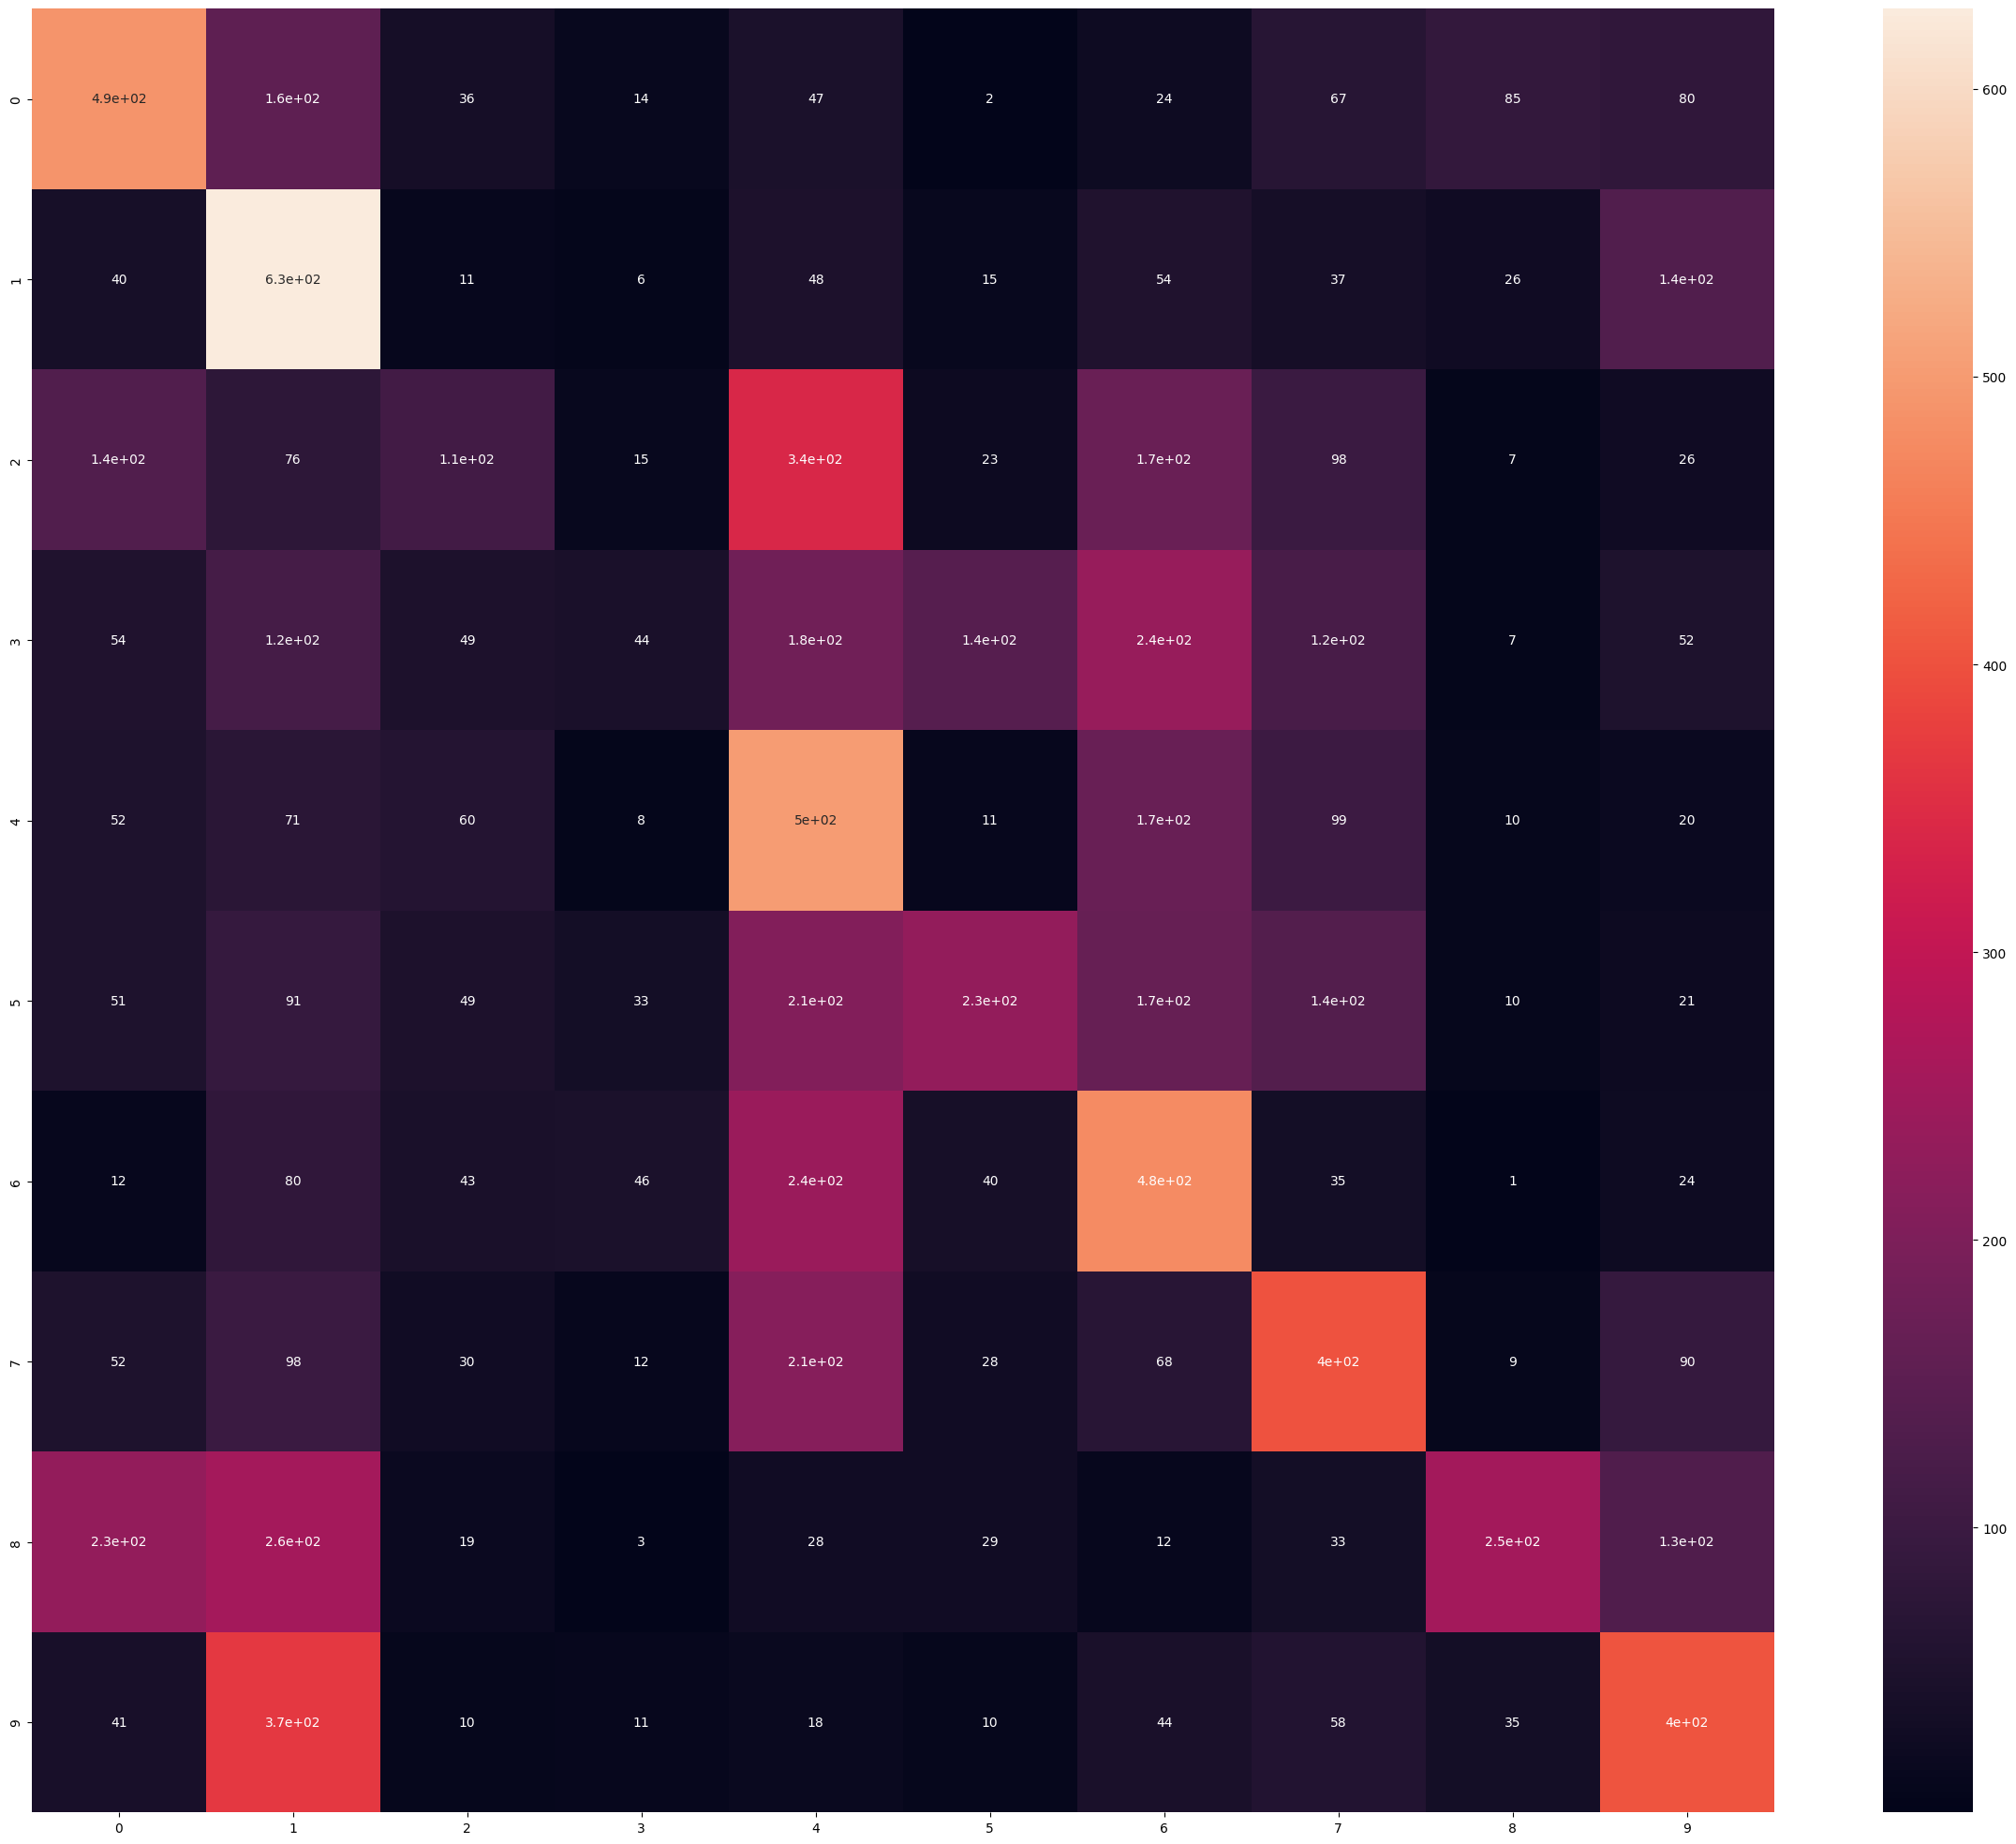

In [127]:
plot_data(history)

# Now with test data (not validation)
import seaborn as sb
import numpy as np

predictions = model.predict(x_test)

predictions = [np.argmax(i) for i in predictions]

plt.figure(figsize=(30, 25))
plt.xlabel('actual')
plt.ylabel('prediction')
sb.heatmap(tf.math.confusion_matrix(y_test, predictions), annot=True)
plt.show()